# Deteksi Outlier dengan K-Nearest Neighbors (KNN) dalam Data Understanding

1.  **Kenapa KNN Bisa Digunakan untuk Deteksi Outlier**

KNN (K-Nearest Neighbors) bisa digunakan untuk deteksi outlier karena caranya yang intuitif dalam mengidentifikasi titik data yang tidak sesuai dengan data lainnya.

Misalkan, jika kita memiliki dataset dengan K=3, kita bisa menghitung jarak antara setiap titik data dan tiga tetangga terdekatnya. Jika rata-rata jarak tersebut melebihi ambang batas yang telah ditentukan, titik data tersebut bisa diklasifikasikan sebagai outlier. Berikut langkah-langkah deteksi Outlier dengan KNN:

a. Menentukan Jarak Antar Titik Data

Kita menggunakan metrik jarak seperti Euclidean Distance, Manhattan Distance, atau Minkowski Distance untuk mengukur jarak antara suatu titik dengan tetangga terdekatnya.

b. Menentukan K (Jumlah Tetangga Terdekat)

Nilai K yang dipilih akan menentukan seberapa banyak tetangga yang dipertimbangkan.

*  Jika K terlalu kecil, model bisa terlalu sensitif terhadap noise.

*  Jika K terlalu besar, outlier bisa terdeteksi secara kurang akurat.

c. Menghitung Skor Kepadatan (Density Score)

Ada beberapa pendekatan untuk mengukur apakah suatu titik adalah outlier:

1. K-Nearest Neighbor Distance

> Menghitung jarak rata-rata ke K tetangga terdekat. Jika jarak rata-rata terlalu besar, titik tersebut dianggap sebagai outlier.

2. Local Outlier Factor (LOF)

> LOF membandingkan kepadatan lokal suatu titik dengan kepadatan lokal tetangganya. Jika kepadatan lokal suatu titik lebih kecil dibandingkan dengan tetangganya, maka titik tersebut dianggap sebagai outlier.

3. Distance-Based Outlier Score

> Jika sebuah titik memiliki jumlah tetangga yang sangat sedikit dalam radius tertentu, maka kemungkinan besar titik tersebut adalah outlier.

4. Kelebihan dan Kekurangan Metode KNN untuk Deteksi Outlier

Kelebihan:

> Mudah dipahami karena berbasis jarak.

> Tidak memerlukan distribusi data tertentu, cocok untuk berbagai jenis dataset.

> Dapat digunakan pada data berdimensi tinggi.

Kekurangan:

> Biaya komputasi tinggi untuk dataset besar karena harus menghitung jarak ke banyak titik.
> Sensitif terhadap nilai K, pemilihan K yang tidak tepat bisa mengurangi akurasi deteksi outlier.


**Kesimpulan**

KNN dapat digunakan dalam tahap Data Understanding untuk mendeteksi outlier dengan menganalisis jarak antara suatu titik dengan tetangga terdekatnya. Dengan metode seperti K-Nearest Neighbor Distance dan Local Outlier Factor (LOF), kita dapat menandai data yang memiliki kepadatan rendah atau jauh dari data lainnya sebagai outlier. Pemilihan nilai K yang tepat dan metrik jarak yang sesuai menjadi faktor penting untuk keberhasilan deteksi outlier dengan KNN



In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.7 MB/s eta 0:00:00


# Penjelasan dan Langkah-langkah:

1. **%pip install pymysql**:
   - **%pip**: Merupakan magic command di Jupyter Notebook untuk menjalankan perintah pip dari dalam notebook.
   - **install pymysql**: Perintah pip untuk menginstal paket pymysql, yaitu modul Python yang digunakan untuk berinteraksi dengan database MySQL. Paket ini memungkinkan kamu untuk menghubungkan dan melakukan operasi database pada MySQL dari skrip Python kamu.

2. **%pip install psycopg2**:
   - **%pip**: Seperti sebelumnya, ini adalah magic command di Jupyter Notebook untuk menjalankan perintah pip.
   - **install psycopg2**: Perintah pip untuk menginstal paket psycopg2, yaitu driver PostgreSQL untuk bahasa pemrograman Python. Paket ini memungkinkan kamu untuk berinteraksi dengan database PostgreSQL dari skrip Python kamu.

Jadi, kedua perintah tersebut digunakan untuk menginstal pustaka yang diperlukan agar Python dapat berkomunikasi dengan database MySQL dan PostgreSQL. Setelah diinstal, kamu dapat menggunakan pustaka ini untuk membuat koneksi, menjalankan query, dan melakukan operasi lain pada database tersebut

 id           class  petal length  petal width  sepal length  sepal width  knn_distance  outlier_knn
  1     Iris-setosa          14.0          2.0          41.0         32.0     46.947204        False
  2     Iris-setosa          14.0          2.0          40.9         30.0     45.707220        False
  4     Iris-setosa          15.0          2.0          23.0         47.0     48.764946        False
  6     Iris-setosa           1.7          0.4           3.5          4.2      4.551923        False
  7     Iris-setosa           1.4          0.3           3.5          5.7      5.422177        False
  8     Iris-setosa           1.5          0.2           4.5          5.0      4.602173        False
  9     Iris-setosa           1.4          0.2           4.3          5.4      4.948737        False
 10     Iris-setosa           1.5          0.1           3.5          4.5      4.884670        False
 11     Iris-setosa           1.5          0.2           4.3          5.6      4.983974    

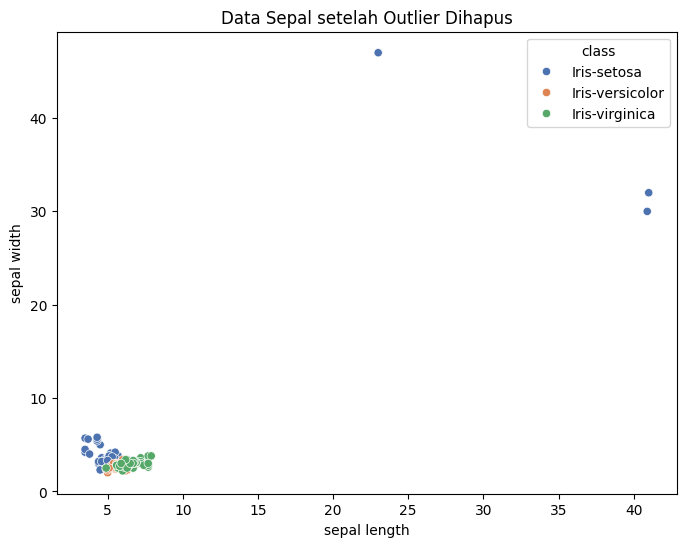

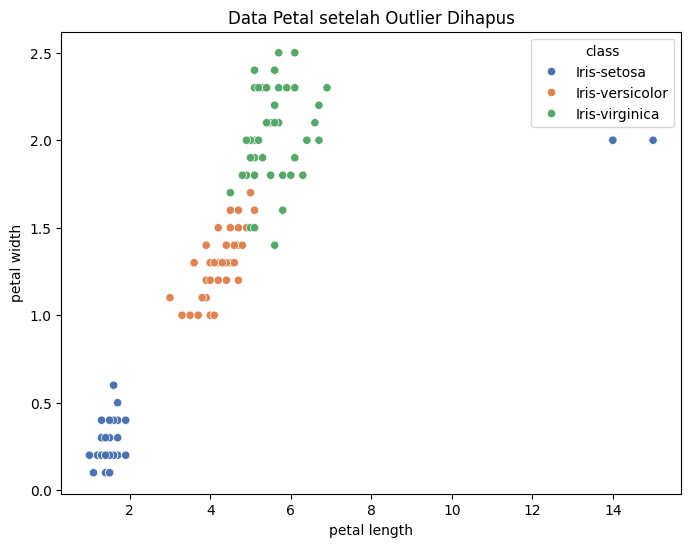

In [3]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-319a464f-auraibraliraiza09.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_EVJaXCw9MKrhLxoQcKj",
        database="defaultdb",
        port=13533
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM lira.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-19018c16-auraibraliraiza09.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_rsy2_HLnOlER6ZAwLDN",
        database="defaultdb",
        port=13533
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)


# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal length", "petal width", "sepal length", "sepal width"]
data_values = df_merged[feature_columns].values

# KNN Outlier Detection
def knn_outlier_detection(data, k=90):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    avg_distances = distances[:, -1]  # Ambil jarak k-terjauh sebagai skor
    return avg_distances

# Hitung K-NN distance
df_merged["knn_distance"] = knn_outlier_detection(data_values, k=90)

# Tentukan threshold sebagai nilai rata-rata + 2 standar deviasi
threshold = df_merged["knn_distance"].mean() + 2 * df_merged["knn_distance"].std()
df_merged["outlier_knn"] = df_merged["knn_distance"] > threshold

# Hapus data outlier
df_filtered = df_merged[~df_merged["outlier_knn"]]

# Cetak hasil setelah outlier dihapus
print(df_filtered.to_string(index=False))
print(f"\nJumlah data setelah outlier dihapus: {len(df_filtered)}")

# Visualisasi setelah outlier dihapus
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_filtered["sepal length"], y=df_filtered["sepal width"],
    hue=df_filtered["class"], palette="deep"
)
plt.title("Data Sepal setelah Outlier Dihapus")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_filtered["petal length"], y=df_filtered["petal width"],
    hue=df_filtered["class"], palette="deep"
)
plt.title("Data Petal setelah Outlier Dihapus")
plt.show()

Berikut adalah singkat dari langkah-langkah deteksi outlier menggunakan KNN:

1. **Mengimpor Library**: Impor library yang dibutuhkan seperti psycopg2, pymysql, NumPy, Pandas, Seaborn, Matplotlib, dan SciPy.

2. **Mengambil Data**: Ambil data dari database PostgreSQL dan MySQL, dan gabungkan berdasarkan kolom 'id' dan 'class'.

3. **Menghitung Jarak Euclidean**: Hitung jarak Euclidean dari setiap titik data ke titik referensi yang dipilih (misalnya, baris terakhir dari dataset).

4. **Menentukan Threshold Outlier**: Tentukan threshold outlier berdasarkan persentil jarak Euclidean (misalnya, persentil ke-93,5).

5. **Identifikasi Outlier**: Tandai titik data yang memiliki jarak lebih besar dari threshold sebagai outlier.

6. **Visualisasi**: Buat scatter plot untuk memvisualisasikan outlier pada data fitur numerik.

Dengan langkah-langkah ini, Anda dapat mendeteksi outlier dalam dataset menggunakan metode KNN.

In [4]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal length", "petal width", "sepal length", "sepal width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")
df_filtered = df_merge[label == 1].drop(columns=["outlier_label"], errors='ignore')
outliers = df_merge[label == -1].drop(columns=["outlier_label"], errors='ignore')
print("\nData Outlier:")
print(outliers.to_string(index=False))
print("\nJumlah data setelah dihapus : ",len(df_filtered))
print("\nData tidak outlier :")
print(df_filtered.to_string(index=False))

 id           class  petal length  petal width  sepal length  sepal width  outlier_label
  1     Iris-setosa          14.0          2.0          41.0         32.0             -1
  2     Iris-setosa          14.0          2.0          40.9         30.0             -1
  3     Iris-setosa          13.0          2.0          40.0         56.0             -1
  4     Iris-setosa          15.0          2.0          23.0         47.0             -1
  5     Iris-setosa          14.0          2.0          38.0         52.0             -1
  6     Iris-setosa           1.7          0.4           3.5          4.2              1
  7     Iris-setosa           1.4          0.3           3.5          5.7              1
  8     Iris-setosa           1.5          0.2           4.5          5.0              1
  9     Iris-setosa           1.4          0.2           4.3          5.4              1
 10     Iris-setosa           1.5          0.1           3.5          4.5              1
 11     Iris-setosa  

In [5]:
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=90, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Pisahkan data dengan outlier dan tanpa outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),
    test_size=0.2,
    random_state=42
)

# Pipeline dengan StandardScaler dan KNN
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Latih model pada data dengan outlier
knn_pipeline.fit(X_train_all, y_train_all)
y_pred_all = knn_pipeline.predict(X_test_all)
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Akurasi dengan outlier:", accuracy_all)
print(classification_report(y_test_all, y_pred_all, target_names=label_encoder.classes_))

# Latih model pada data tanpa outlier
knn_pipeline.fit(X_train_clean, y_train_clean)
y_pred_clean = knn_pipeline.predict(X_test_clean)
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print("Akurasi tanpa outlier:", accuracy_clean)
print(classification_report(y_test_clean, y_pred_clean, target_names=label_encoder.classes_))

Akurasi dengan outlier: 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Akurasi tanpa outlier: 0.9629629629629629
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.86      0.92         7
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.96        27
      macro avg       0.96      0.95      0.95        27
   weighted avg       0.97      0.96      0.96        27



Akurasi: 0.9629629629629629
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.86      0.92         7
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.96        27
      macro avg       0.96      0.95      0.95        27
   weighted avg       0.97      0.96      0.96        27



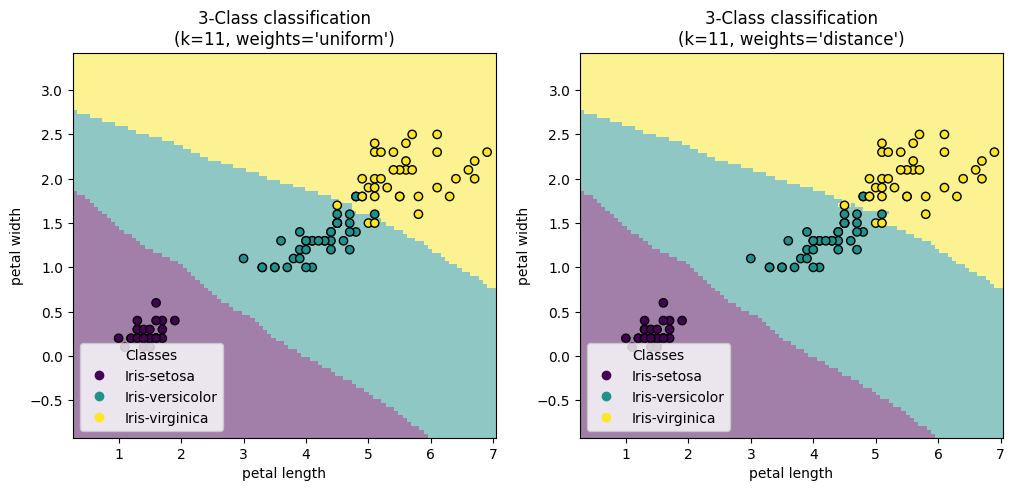

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["petal length", "petal width"]
X = df_cleaned[feature_columns]
y = df_cleaned["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Ubah nama kelas jadi angka

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

Akurasi: 0.8148148148148148
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.62      0.71      0.67         7
 Iris-virginica       0.71      0.62      0.67         8

       accuracy                           0.81        27
      macro avg       0.78      0.78      0.78        27
   weighted avg       0.82      0.81      0.81        27



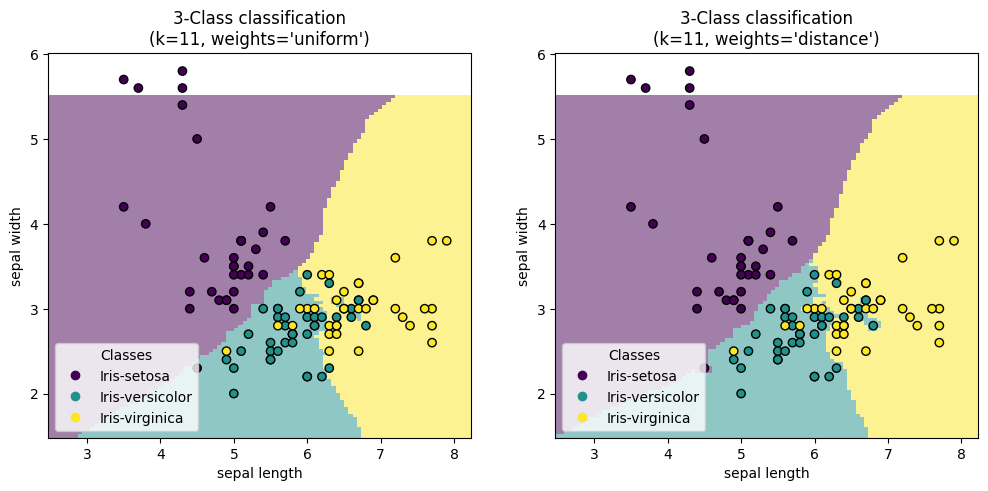

In [9]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay


# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["sepal length", "sepal width"]
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Mengubah nama kelas menjadi angka

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),  # Pastikan target dalam bentuk numerik
    test_size=0.2,
    random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()


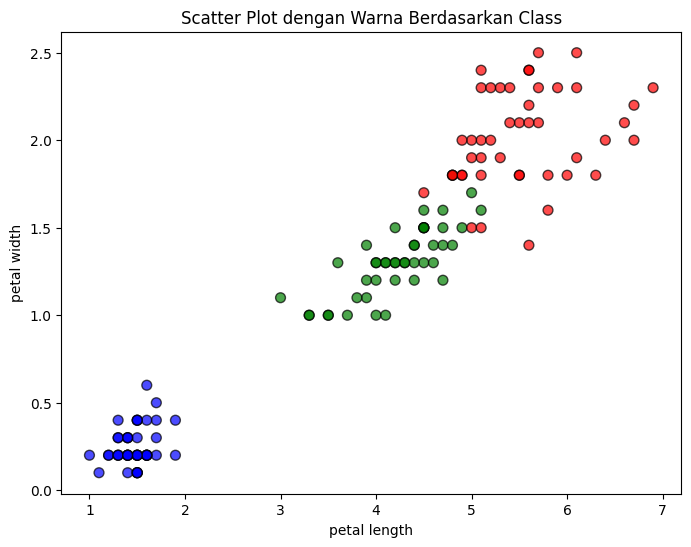

In [11]:
import matplotlib.pyplot as plt

# Pilih dua fitur untuk scatter plot
x_feature = "petal length"
y_feature = "petal width"

# Warna berdasarkan kelas
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}
df_cleaned["color"] = df_cleaned["class"].map(colors)

# Plot scatter dengan ukuran (s) dan warna (c)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_feature], df_cleaned[y_feature], s=50, c=df_cleaned["color"], alpha=0.7, edgecolors="k")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot dengan Warna Berdasarkan Class")
plt.show()

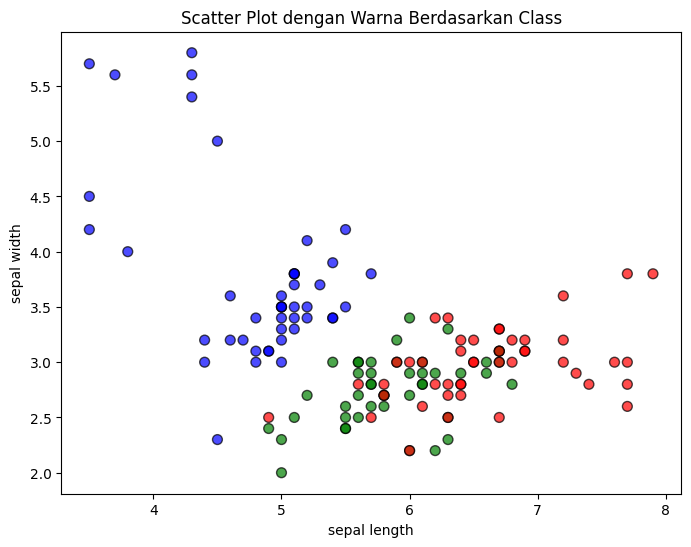

In [12]:
import matplotlib.pyplot as plt

# Pilih dua fitur untuk scatter plot
x_feature = "sepal length"
y_feature = "sepal width"

# Warna berdasarkan kelas
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}
df_cleaned["color"] = df_cleaned["class"].map(colors)

# Plot scatter dengan ukuran (s) dan warna (c)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_feature], df_cleaned[y_feature], s=50, c=df_cleaned["color"], alpha=0.7, edgecolors="k")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot dengan Warna Berdasarkan Class")
plt.show()